In [4]:
import numpy as np
import pandas as pd

import scienceplots  # noqa: F401
import seaborn as sns
import matplotlib.pyplot as plt

from utils.constants import METRICS


plt.style.use(["science", "nature"])
plt.rcParams.update(
    {
        "font.size": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "axes.labelsize": 12,
        "legend.fontsize": 12,
    }
)

In [2]:
metrics_columns = list(METRICS.keys())
metrics_columns

['entropy',
 'sampen',
 'permutation_entropy',
 'shannon_entropy',
 'spectral_entropy',
 'app_entropy',
 'hurst',
 'dfa',
 'mfhurst_b',
 'higuchi_fd',
 'katz_fd',
 'petrosian_fd',
 'lepel_ziv',
 'corr_dim']

## Testing EWM

In [5]:
# Read a random metric file to see how to plot what I want (you'll see)
df = pd.read_csv("data/ForbushDecrease/2024-03-24/invk_metrics-windowsize_130.csv", index_col=0)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-03-23 00:00:00 to 2024-03-26 11:58:00
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value                2520 non-null   float64
 1   window_shape         2520 non-null   int64  
 2   entropy              2520 non-null   float64
 3   sampen               2520 non-null   float64
 4   permutation_entropy  2520 non-null   float64
 5   shannon_entropy      2520 non-null   float64
 6   spectral_entropy     2520 non-null   float64
 7   app_entropy          2520 non-null   float64
 8   hurst                2520 non-null   float64
 9   dfa                  2520 non-null   float64
 10  mfhurst_b            2520 non-null   float64
 11  higuchi_fd           2520 non-null   float64
 12  katz_fd              2520 non-null   float64
 13  petrosian_fd         2520 non-null   float64
 14  lepel_ziv            2520 non-null   int64  
 15  co

In [6]:
ewm_columns = metrics_columns + ["value"]
new_df = df.copy()
new_df[ewm_columns] = df[ewm_columns].ewm(alpha=0.15).mean()

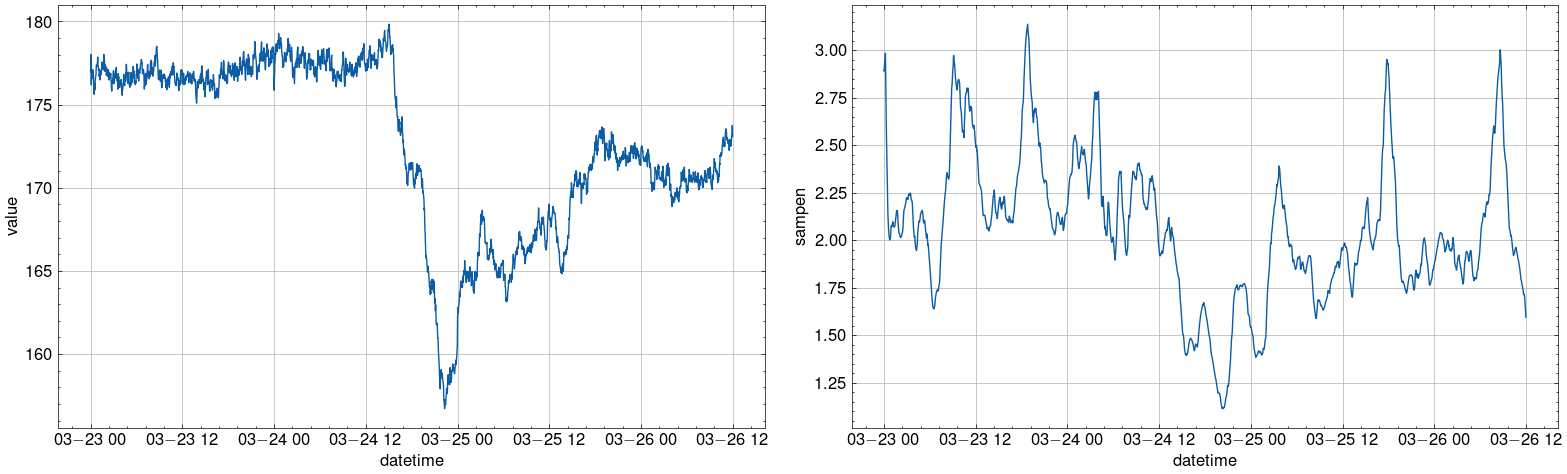

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.lineplot(new_df, x="datetime", y="value", ax=axes[0])
sns.lineplot(new_df, x="datetime", y="sampen", ax=axes[1])

for ax in axes.flatten():
    ax.grid()

fig.tight_layout()
plt.show()

## Testing new plots

Normalization. And an offset of 10 it's appropiate

In [8]:
new_df = df.copy()
 
for metric in ewm_columns:   
    new_df[metric] = (new_df[metric] - new_df[metric].mean()) / new_df[metric].std()

In [10]:
describe = new_df.describe()
for col in describe.columns:
    min_value = np.abs(describe[col]["min"])
    max_value = np.abs(describe[col]["max"])
    print(f"col: {col} --- Offset: {max_value + min_value}")

col: value --- Offset: 5.48757262751652
col: window_shape --- Offset: 195.0
col: entropy --- Offset: 8.515131344023676
col: sampen --- Offset: 5.528814980619043
col: permutation_entropy --- Offset: 6.196754900019375
col: shannon_entropy --- Offset: 6.19364803081748
col: spectral_entropy --- Offset: 4.411392221680092
col: app_entropy --- Offset: 7.66409888246819
col: hurst --- Offset: 7.195117731709187
col: dfa --- Offset: 7.606751605106197
col: mfhurst_b --- Offset: 5.5488907840572175
col: higuchi_fd --- Offset: 5.6202910347544695
col: katz_fd --- Offset: 5.628537803131111
col: petrosian_fd --- Offset: 7.332217371525321
col: lepel_ziv --- Offset: 7.610736105550719
col: corr_dim --- Offset: 6.6021291003276055


In [35]:
OFFSET = 10
plot_df = new_df.copy()

for i, col in enumerate(ewm_columns, start=1):
    plot_df[col] = plot_df[col] + OFFSET * i

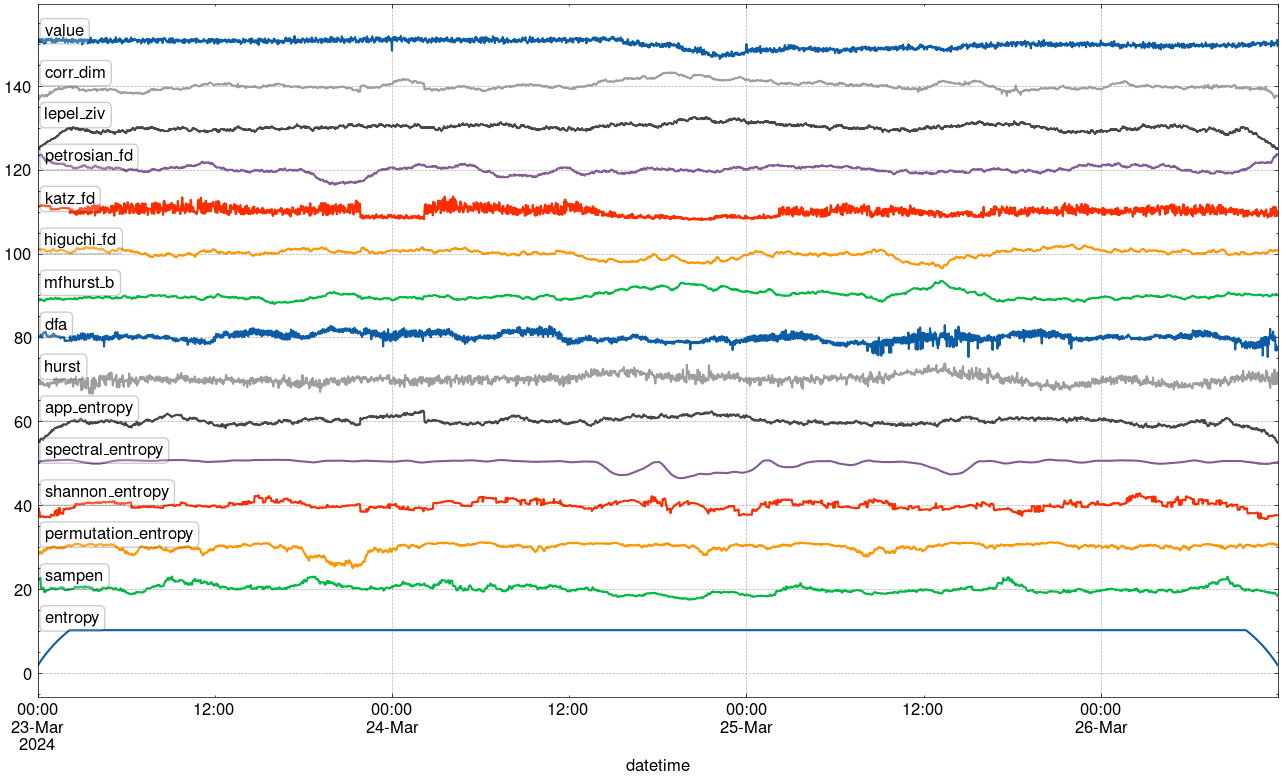

In [45]:
fig, ax = plt.subplots(figsize=(16, 9))
plot_df[ewm_columns].plot(ax=ax, linewidth=1.5)

for i, col in enumerate(ewm_columns, start=1):
    ax.text(
        x=plot_df.index[15],
        y=OFFSET * i + 3,
        s=col,
        fontsize=12,
        va="center",
        ha="left",
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.2),
    )

ax.grid(True, linestyle="--", alpha=1)
ax.legend().remove()
# ax.legend(bbox_to_anchor=(1.0, 1), loc="upper left", borderaxespad=0.0)

plt.show()